# **監督學習專案：分類問題（使用決策樹算法）**

### **說明**：
此專案利用已經標註好的數據來訓練模型，目的是讓模型學會預測新數據的分類。具體地，我們使用 Iris 數據集來訓練一個決策樹模型，根據花的特徵（如花瓣和花萼的長度和寬度）來預測花的種類（如 Iris-setosa、Iris-versicolor 或 Iris-virginica）。

### **使用方法**：決策樹（Decision Tree）

理論：決策樹的核心思想是將數據分割成不同的區間，並根據每個區間的結果進行分類或回歸。它模擬了人類在做決策時的過程，通過一系列的“如果-那麼”規則來預測結果。每個分支代表一次決策，最終樹葉節點就是分類結果。

In [1]:
# Step 1: 安裝必要的庫
!pip install scikit-learn

In [53]:
# Step 2: 匯入所需庫
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [54]:
# Step 3: 加載 Iris 數據集
iris = load_iris()
X = iris.data
y = iris.target

Iris 數據集是機器學習和統計學中最著名的數據集之一，經常被用來進行分類、聚類等數據分析的入門練習。這個數據集由英國統計學家和生物學家 Ronald Fisher 在 1936 年發表，數據集中包含 150 筆樣本，每筆樣本都代表一朵 Iris 花。該數據集主要被用來展示分類算法的效果。

Iris 數據集的特點
樣本數量：總共 150 筆數據。
特徵數量：4 個特徵，每個特徵是數值型的。
類別數量：分為 3 類，每個類別代表一種 Iris 花的物種。
特徵列表：

1.花萼長度（Sepal Length）：以公分為單位。

2.花萼寬度（Sepal Width）：以公分為單位。

3.花瓣長度（Petal Length）：以公分為單位。

4.花瓣寬度（Petal Width）：以公分為單位。


類別標籤：數據集中有 3 種 Iris 花的分類：
Iris-setosa
Iris-versicolor
Iris-virginica 每種花有 50 個樣本。

In [55]:
# 隨機選擇一些數據點進行繪圖
random_indices = np.random.choice(len(X), size=20, replace=False)  # 隨機選取20個數據點
X_sample = X[random_indices]
y_sample = y[random_indices]

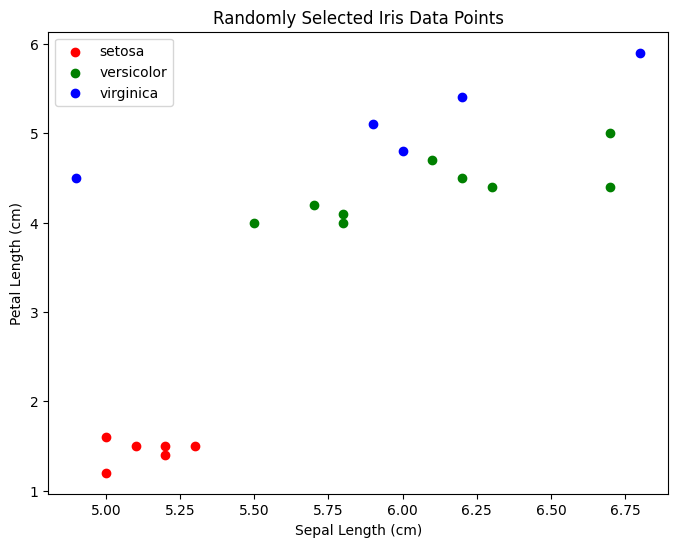

In [56]:
# Step 4: 繪製隨機選取的數據點
plt.figure(figsize=(8, 6))
for i, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    plt.scatter(X_sample[y_sample == i][:, 0], X_sample[y_sample == i][:, 2], color=color, label=iris.target_names[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Randomly Selected Iris Data Points')
plt.legend()
plt.show()

In [57]:
# Step 5: 將數據集拆分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [58]:
# Step 6: 初始化決策樹分類器
clf = DecisionTreeClassifier()

In [59]:
# Step 7: 訓練分類器
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
# Step 8: 使用測試集進行預測
y_pred = clf.predict(X_test)

In [61]:
# Step 9: 計算模型的準確度
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.38%


<ipython-input-64-a1c3c143e8c9>:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 2], c='green', marker='x', label="Predicted", s=100, edgecolors='black')


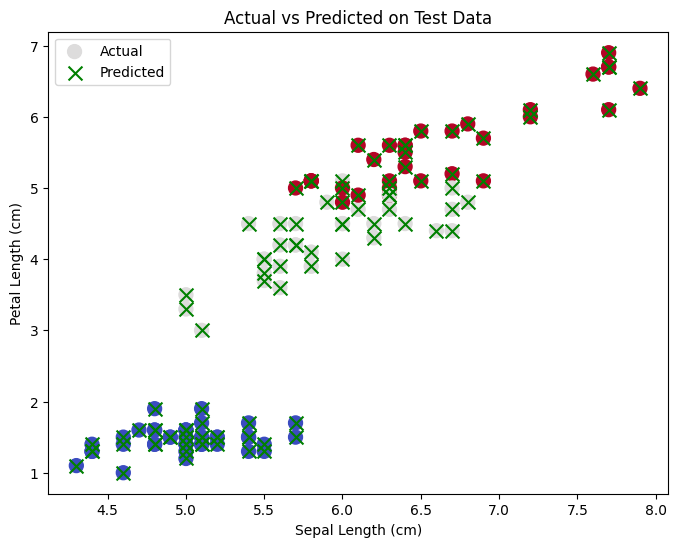

In [64]:
# Step 10: 視覺化預測結果與實際值，避免使用灰色
plt.figure(figsize=(8, 6))

# 實際值的散點圖，使用圓形標記 'o'
plt.scatter(X_test[:, 0], X_test[:, 2], c=y_test, marker='o', label="Actual", cmap='coolwarm', s=100)

# 預測值的散點圖，使用 'X' 標記，顏色與實際值區別開來
plt.scatter(X_test[:, 0], X_test[:, 2], c='green', marker='x', label="Predicted", s=100, edgecolors='black')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Actual vs Predicted on Test Data')

# 增加圖例
plt.legend(['Actual', 'Predicted'])
plt.show()


手寫數字數據集（Digits - 分類問題）
手寫數字識別。每個數據點是一張 8x8 的手寫數字圖片（共 10 類，0 到 9）。這個數據集在圖像分類中常用於測試分類算法的效果。

特徵數量：64（8x8 像素的圖像）
數據點：1797

In [41]:
# Step 2: 匯入所需庫
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [42]:
# Step 3: 加載手寫數字數據集
digits = load_digits()
X = digits.data  # 每個數字的特徵數據（8x8 像素）
y = digits.target  # 每個數字對應的實際標籤（0-9）


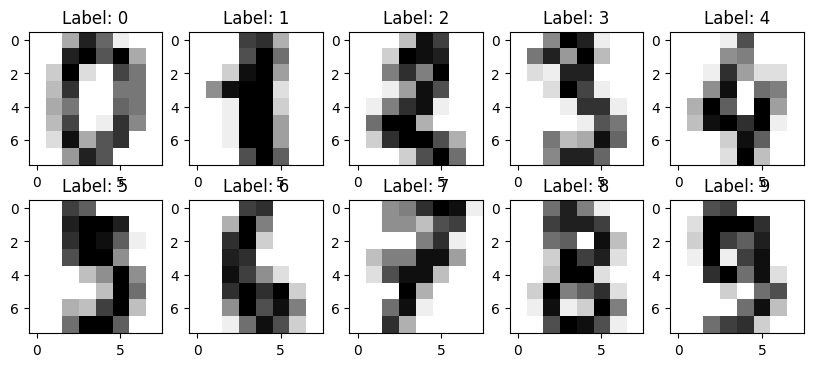

In [43]:
# Step 4: 隨機選擇一些數據點進行繪圖（展示數字圖像）
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
plt.show()

In [44]:
# Step 5: 將數據集拆分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Step 6: 初始化決策樹分類器
clf = DecisionTreeClassifier(max_depth=10)

In [46]:
# Step 7: 訓練分類器
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [47]:
# Step 8: 使用測試集進行預測
y_pred = clf.predict(X_test)

In [48]:
# Step 9: 計算模型的準確度
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.26%


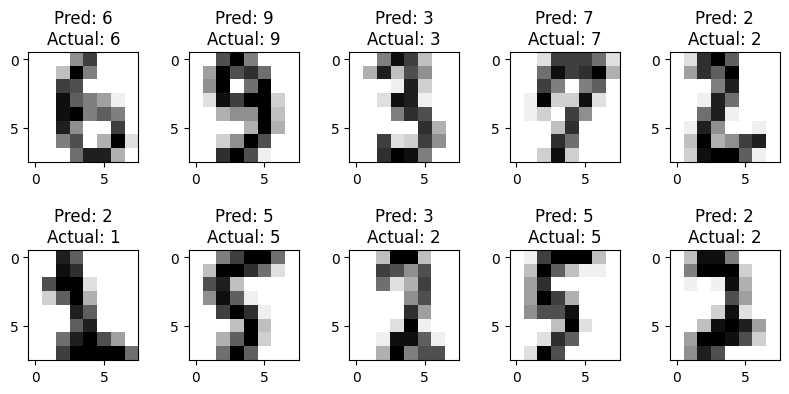

In [51]:
# Step 10: 可視化預測結果與實際值
plt.figure(figsize=(10, 4))

# 顯示前 10 個測試數據點的預測與實際值
for index, (image, pred, actual) in enumerate(zip(X_test[:10], y_pred[:10], y_test[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Pred: {pred}\nActual: {actual}')

# 調整子圖之間的間距
plt.subplots_adjust(hspace=0.8)  # 增加縱向間距
plt.show()